In [1]:
pip install tensorflow_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

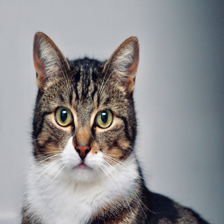

In [65]:
img = Image.open("cat.jpg").resize(IMAGE_SHAPE)
img

In [6]:
img = np.array(img)/255.0
img.shape

(224, 224, 3)

In [7]:
img[np.newaxis, ...]

array([[[[0.71764706, 0.71372549, 0.7372549 ],
         [0.70980392, 0.71372549, 0.73333333],
         [0.71764706, 0.71764706, 0.7372549 ],
         ...,
         [0.25882353, 0.30196078, 0.35294118],
         [0.25490196, 0.29019608, 0.3372549 ],
         [0.25490196, 0.30980392, 0.36470588]],

        [[0.72156863, 0.71764706, 0.7372549 ],
         [0.70588235, 0.71764706, 0.7372549 ],
         [0.70588235, 0.72156863, 0.7372549 ],
         ...,
         [0.25882353, 0.29803922, 0.35686275],
         [0.25882353, 0.28627451, 0.34901961],
         [0.25882353, 0.30196078, 0.36078431]],

        [[0.71372549, 0.72156863, 0.7372549 ],
         [0.70196078, 0.72156863, 0.74117647],
         [0.70588235, 0.71764706, 0.7372549 ],
         ...,
         [0.26666667, 0.30588235, 0.35294118],
         [0.25490196, 0.29411765, 0.34509804],
         [0.25098039, 0.29803922, 0.36078431]],

        ...,

        [[0.69019608, 0.69803922, 0.71764706],
         [0.6745098 , 0.69019608, 0.71764706]

In [8]:
result = classifier.predict(img[np.newaxis, ...])
result.shape

(1, 1001)

In [9]:
predicted_label_index = np.argmax(result)
predicted_label_index

282

In [11]:
# tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [12]:
image_labels[predicted_label_index]


'tabby'

In [13]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228827136/228813984 [==============================] - 2s 0us/step


In [14]:
data_dir

'./datasets/flower_photos'

In [15]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [16]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/daisy/8706810197_17b6c1f1e7.jpg'),
 PosixPath('datasets/flower_photos/daisy/512177035_70afc925c8.jpg'),
 PosixPath('datasets/flower_photos/daisy/7538403124_f2fc48750a.jpg'),
 PosixPath('datasets/flower_photos/daisy/2641151167_3bf1349606_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/8708143485_38d084ac8c_n.jpg')]

In [17]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [18]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/3909587261_f8cd3e7fe7.jpg'),
 PosixPath('datasets/flower_photos/roses/4644336779_acd973528c.jpg'),
 PosixPath('datasets/flower_photos/roses/3074406590_91c697c805_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8853083579_dd1dfa3188.jpg'),
 PosixPath('datasets/flower_photos/roses/15922772266_1167a06620.jpg')]

In [24]:
pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
from PIL import Image

In [39]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [40]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [33]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/3909587261_f8cd3e7fe7.jpg'),
 PosixPath('datasets/flower_photos/roses/4644336779_acd973528c.jpg'),
 PosixPath('datasets/flower_photos/roses/3074406590_91c697c805_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8853083579_dd1dfa3188.jpg'),
 PosixPath('datasets/flower_photos/roses/15922772266_1167a06620.jpg')]

In [34]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/3909587261_f8cd3e7fe7.jpg'

In [35]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [36]:
img.shape

(333, 500, 3)

In [37]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [41]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [42]:
X = np.array(X)
y = np.array(y)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [55]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [56]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

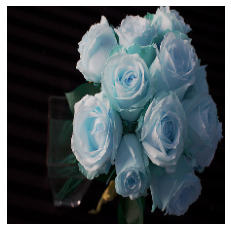

In [57]:
plt.axis('off')
plt.imshow(X[0])

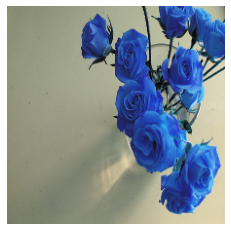

In [58]:
plt.axis('off')
plt.imshow(X[1])

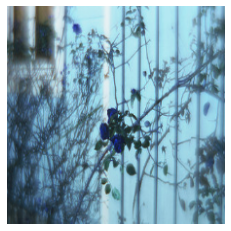

In [59]:
plt.axis('off')
plt.imshow(X[2])

In [60]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

array([722, 795, 795])

In [61]:
image_labels[795]

'shower curtain'

In [62]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [63]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [64]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 64s 704ms/step - loss: 0.8367 - acc: 0.6828
Epoch 2/5
86/86 [==============================] - 59s 684ms/step - loss: 0.4101 - acc: 0.8565
Epoch 3/5
86/86 [==============================] - 63s 738ms/step - loss: 0.3264 - acc: 0.8884
Epoch 4/5
86/86 [==============================] - 65s 754ms/step - loss: 0.2718 - acc: 0.9139
Epoch 5/5
86/86 [==============================] - 59s 687ms/step - loss: 0.2319 - acc: 0.9331


In [66]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 21s 675ms/step - loss: 0.3592 - acc: 0.8769


[0.35917145013809204, 0.8769063353538513]